<a href="https://colab.research.google.com/github/dmcghee173268/CS4410/blob/main/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
cancer.target[::100]

array([0, 0, 1, 0, 0, 1])

In [5]:
cancer.data.shape

(569, 30)

In [6]:
cancer.target.shape

(569,)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=11)

In [9]:
X_train.shape

(426, 30)

In [10]:
X_test.shape

(143, 30)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [14]:
predicted = knn.predict(X=X_test)

In [15]:
expected = y_test

In [16]:
predicted[:20]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [17]:
expected[:20]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [18]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [19]:
wrong

[(1, 0), (0, 1), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0), (1, 0)]

In [20]:
print(f'{knn.score(X_test, y_test):.2%}')

94.41%


In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [23]:
confusion

array([[43,  7],
       [ 1, 92]])

In [24]:
from sklearn.metrics import classification_report

In [25]:
names = [str(digit) for digit in cancer.target_names]  

In [26]:
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

   malignant       0.98      0.86      0.91        50
      benign       0.93      0.99      0.96        93

    accuracy                           0.94       143
   macro avg       0.95      0.92      0.94       143
weighted avg       0.95      0.94      0.94       143



In [27]:
import pandas as pd

In [28]:
confusion_df = pd.DataFrame(confusion, index=range(2), columns=range(2))

In [29]:
import seaborn as sns

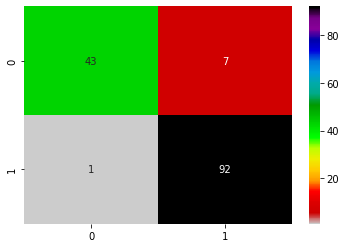

In [30]:
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [31]:
from sklearn.model_selection import KFold

In [32]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
from sklearn.naive_bayes import GaussianNB 

In [35]:
nb = GaussianNB()

In [36]:
scores = cross_val_score(estimator=nb, X=cancer.data, y=cancer.target, cv=kfold)

In [37]:
scores

array([0.96491228, 0.9122807 , 0.94736842, 0.89473684, 0.96491228,
       0.94736842, 0.96491228, 0.89473684, 0.96491228, 0.92857143])

In [38]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 93.85%


In [39]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 2.75%


In [40]:
from sklearn.svm import SVC

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'GaussianNB': nb}

In [43]:
for estimator_name, estimator_object in estimators.items(): 
    kfold = KFold(n_splits=10, random_state=11, shuffle=True) 
    scores = cross_val_score(estimator=estimator_object, X=cancer.data, y=cancer.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2%}: ' + f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=92.79%: standard deviation=2.01%
                 SVC: mean accuracy=91.92%: standard deviation=3.52%
  LogisticRegression: mean accuracy=95.08%: standard deviation=3.02%
          GaussianNB: mean accuracy=93.85%: standard deviation=2.75%
